<a href="https://colab.research.google.com/github/LEEGWONSEOK/CSAI_assignment/blob/main/%5B%EA%B7%B9%EB%9D%BD%5D_n221a_decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.7/dist-packages (0.24.2)


In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Created wheel for pandas-profiling: filename=pandas_profiling-3.0.0-py2.py3-none-any.whl size=248525 sha256=fcdfef72e607c42425a79fc1369bcf9970e76a489a81de63af16a659fdc1471f
  Stored in directory: /tmp/pip-ephem-wheel-cache-jocyo20e/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling


In [ ]:
pip install --upgrade category_encoders

Requirement already up-to-date: category_encoders in /usr/local/lib/python3.7/dist-packages (2.2.2)


In [ ]:
## module
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

#### **01) 데이터 생성 및 확인**

In [ ]:
train_labels_data = 'https://raw.githubusercontent.com/LEEGWONSEOK/Kaggle01_Prediction-of-H1N1-vaccination/main/_dataset/train_labels.csv'
train_data = 'https://raw.githubusercontent.com/LEEGWONSEOK/Kaggle01_Prediction-of-H1N1-vaccination/main/_dataset/train.csv'
test_data = 'https://raw.githubusercontent.com/LEEGWONSEOK/Kaggle01_Prediction-of-H1N1-vaccination/main/_dataset/test.csv'

target = 'vacc_h1n1_f'
#target = 'vacc_seas_f'

train = pd.merge(pd.read_csv(train_data), pd.read_csv(train_labels_data)[target], left_index=True, right_index=True)
test = pd.read_csv(test_data)

In [ ]:
train.head().T

,0,1,2,3,4
h1n1_concern,NaN,3,2,2,1
h1n1_knowledge,NaN,1,1,2,2
behavioral_antiviral_meds,NaN,0,0,1,0
behavioral_avoidance,NaN,0,1,1,1
behavioral_face_mask,NaN,0,0,0,0
behavioral_wash_hands,NaN,1,1,1,1
behavioral_large_gatherings,NaN,0,1,0,0
behavioral_outside_home,NaN,0,0,0,0
behavioral_touch_face,NaN,1,1,0,1
doctor_recc_h1n1,0,0,0,0,0


In [ ]:
#train.dtypes

#### **02) 기준모델(Baseline Model)**

In [ ]:
## 개념부터 다시 해봐야겠다 ㅜ

predict = train['vacc_h1n1_f'].mean()

predict
#errors = predict - train['vacc_h1n1_f']
#errors

0.2390653263351422

#### **03) 데이터 세트 분리(train / valid / test)**

In [ ]:
train, val = train_test_split(train, train_size=0.8, test_size=0.2,
                              stratify=train[target], random_state=2)

train.shape, val.shape, test.shape  # : ((33723, 39), (8431, 39), (28104, 38))

((33723, 39), (8431, 39), (28104, 38))

#### **04) train[target] 비율 확인**

In [ ]:
train[target].value_counts(normalize=True)

# 클래스         : 2개(0, 1)인 분류 문제
# 가장 큰 범주(0) : 76.15%를 차지
# 클래스         : 불균형(imbalanced)

0    0.760935
1    0.239065
Name: vacc_h1n1_f, dtype: float64

#### **05) Profiling : 데이터리포팅**

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(train, minimal=True).to_notebook_iframe()

Summarize dataset:   0%|          | 0/48 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
train.select_dtypes('float').head(20).T

,20365,29138,36128,39793,32973,31450,17541,33946,5300,34292,19463,9609,34149,30019,22287,14807,4945,26695,9029,18078
h1n1_concern,1.0,1.0,2.0,2.0,0.0,0.0,3.0,2.0,2.0,3.0,2.0,1.0,3.0,2.0,2.0,3.0,0.0,NaN,2.0,0.0
h1n1_knowledge,1.0,1.0,2.0,1.0,1.0,1.0,0.0,2.0,2.0,0.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,NaN,1.0,2.0
behavioral_antiviral_meds,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
behavioral_avoidance,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,NaN,1.0,1.0
behavioral_face_mask,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0
behavioral_wash_hands,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,NaN,1.0,1.0
behavioral_large_gatherings,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,NaN,1.0,1.0
behavioral_outside_home,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,NaN,1.0,1.0
behavioral_touch_face,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0
doctor_recc_h1n1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
train.T.duplicated()

h1n1_concern                   False
h1n1_knowledge                 False
behavioral_antiviral_meds      False
behavioral_avoidance           False
behavioral_face_mask           False
behavioral_wash_hands          False
behavioral_large_gatherings    False
behavioral_outside_home        False
behavioral_touch_face          False
doctor_recc_h1n1               False
doctor_recc_seasonal           False
chronic_med_condition          False
child_under_6_months           False
health_insurance               False
health_worker                  False
opinion_h1n1_vacc_effective    False
opinion_h1n1_risk              False
opinion_h1n1_sick_from_vacc    False
opinion_seas_vacc_effective    False
opinion_seas_risk              False
opinion_seas_sick_from_vacc    False
agegrp                         False
education_comp                 False
raceeth4_i                     False
sex_i                          False
inc_pov                        False
marital                        False
r

In [ ]:
train.describe(exclude='number')

,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,agegrp,employment_status,census_msa,employment_industry,employment_occupation,state
count,26637,26602,26568,26519,26466,26413,33723,25466,33723,13714,13714,33723
unique,6,6,6,6,6,6,7,3,3,23,25,51
top,Somewhat Effective,Somewhat Low,Not Very Worried,Somewhat Effective,Somewhat Low,Not At All Worried,65+ Years,Employed,"MSA, Not Principle City",Health Care and Social Assistance Industries,Management Occupations,CALIFORNIA
freq,11710,9980,9229,11571,9057,11813,6821,13722,15202,2451,1769,829


In [ ]:
train.describe(exclude='number').T.sort_values(by='unique')

,count,unique,top,freq
employment_status,25466,3,Employed,13722
census_msa,33723,3,"MSA, Not Principle City",15202
opinion_h1n1_vacc_effective,26637,6,Somewhat Effective,11710
opinion_h1n1_risk,26602,6,Somewhat Low,9980
opinion_h1n1_sick_from_vacc,26568,6,Not Very Worried,9229
opinion_seas_vacc_effective,26519,6,Somewhat Effective,11571
opinion_seas_risk,26466,6,Somewhat Low,9057
opinion_seas_sick_from_vacc,26413,6,Not At All Worried,11813
agegrp,33723,7,65+ Years,6821
employment_industry,13714,23,Health Care and Social Assistance Industries,2451


높은 카디널리티 특성
- employment_industry
- employment_occupation
- state

In [ ]:
## 카테고리를 많이 가지는 특성의 범주 : employment_industry
train['employment_industry'].value_counts()

Health Care and Social Assistance Industries                     2451
Education Services Industries                                    1860
Professional, Scientific, and Technical Services Industries      1260
Retail Trade Industries                                          1080
Construction Industries                                           919
Public Administration Industries                                  867
Manufacturing Industries                                          836
Finance and Insurance Industries                                  609
Other Services (except Public)                                    568
Accommodation and Food Services Industries                        518
Transportation and Warehousing Industries                         508
Information Industries                                            343
Administrative and Support and Waste Management                   333
Agriculture, Forestry, Fishing, and Hunting Industries            293
Arts, Entertainment,

#### **06) Features Engineering**

In [ ]:
import numpy as np

def engineer(df):
    # 높은 카디널리티를 가지는 특성 제거.
    selected_cols = df.select_dtypes(include=['number', 'object'])
    labels = selected_cols.nunique()
    selected_features = labels[labels <= 20].index.tolist() # 30보다 작은 특성 선택
    df = df[selected_features]

    # 새로운 특성 생성
    behaviorals = [col for col in df.columns if 'behavioral' in col]
    df['behaviorals'] = df[behaviorals].sum(axis=1)
    
    dels = [col for col in df.columns if ('employment' in col or 'seas' in col)]
    #dels = ['agegrp', 'opinion_seas_sick_from_vacc', 'opinion_seas_risk',
    #        'opinion_h1n1_sick_from_vacc', 'opinion_h1n1_risk', 
    #        'opinion_h1n1_vacc_effective', 'opinion_seas_vacc_effective']
    df.drop(columns=dels, inplace=True)

    return df

train = engineer(train)
val = engineer(val)
test = engineer(test)

features = train.drop(columns=[target]).columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

#### **07) 세트별 target/features 분리**

In [ ]:
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

#### **08) 결정트리모델(Decision Tree Model)**

In [ ]:
## 모듈

from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [ ]:
from sklearn.tree import DecisionTreeClassifier

pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True),  
    SimpleImputer(), 
    DecisionTreeClassifier(random_state=1, criterion='entropy')
)

pipe.fit(X_train, y_train)
print('훈련 정확도 : ', pipe.score(X_train, y_train))
print('검증 정확도 : ', pipe.score(X_val, y_val))

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


훈련 정확도 :  0.9908667674880646
검증 정확도 :  0.7572055509429486


In [ ]:
y_val.value_counts(normalize=True)

0    0.761001
1    0.238999
Name: vacc_h1n1_f, dtype: float64

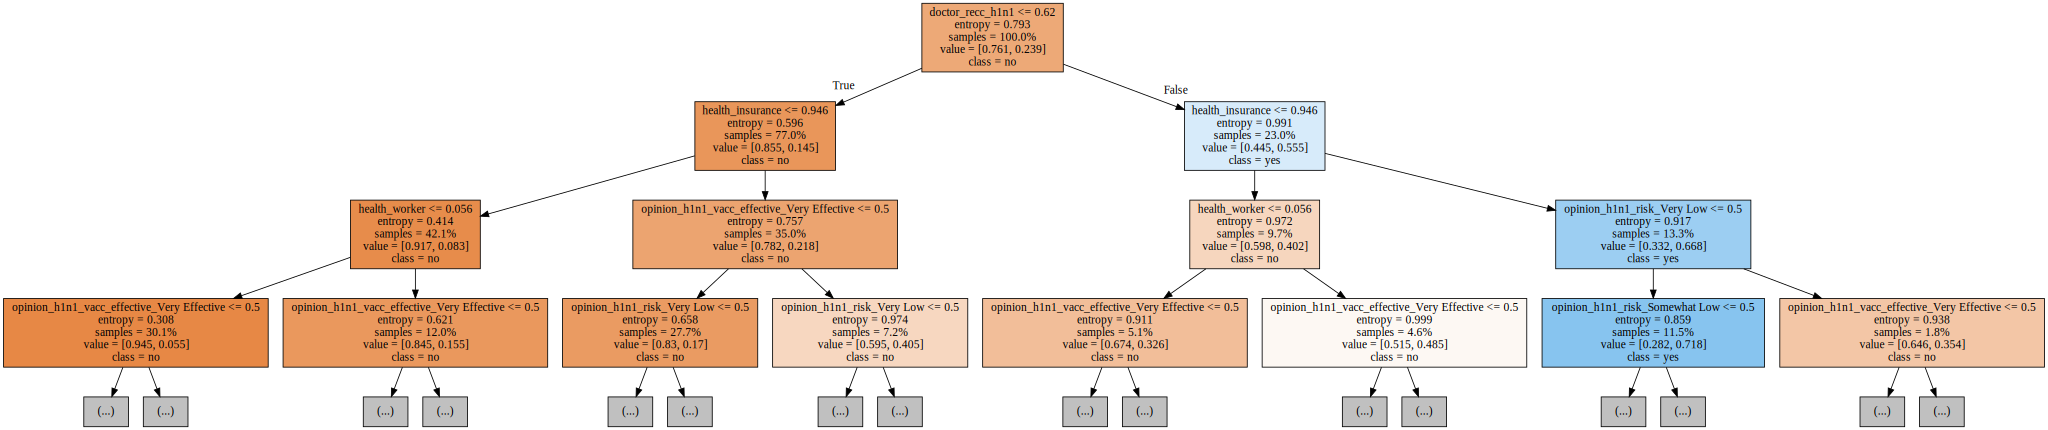

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

model_dt = pipe.named_steps['decisiontreeclassifier']
enc = pipe.named_steps['onehotencoder']
encoded_columns = enc.transform(X_val).columns

dot_data = export_graphviz(model_dt
                          , max_depth=3
                          , feature_names=encoded_columns
                          , class_names=['no', 'yes']
                          , filled=True
                          , proportion=True)


display(graphviz.Source(dot_data))

In [ ]:
pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    DecisionTreeClassifier(min_samples_leaf=10, random_state=2)
)

pipe.fit(X_train, y_train)
print('훈련 정확도 : ', pipe.score(X_train, y_train))
print('검증 정확도 : ', pipe.score(X_val, y_val))

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


훈련 정확도 :  0.8577528689618361
검증 정확도 :  0.8029889692800379


In [ ]:
pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    DecisionTreeClassifier(max_depth=6, random_state=2)
)

pipe.fit(X_train, y_train)
print('훈련 정확도 : ', pipe.score(X_train, y_train))
print('검증 정확도 : ', pipe.score(X_val, y_val))

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


훈련 정확도 :  0.8283367434688491
검증 정확도 :  0.8269481674771676


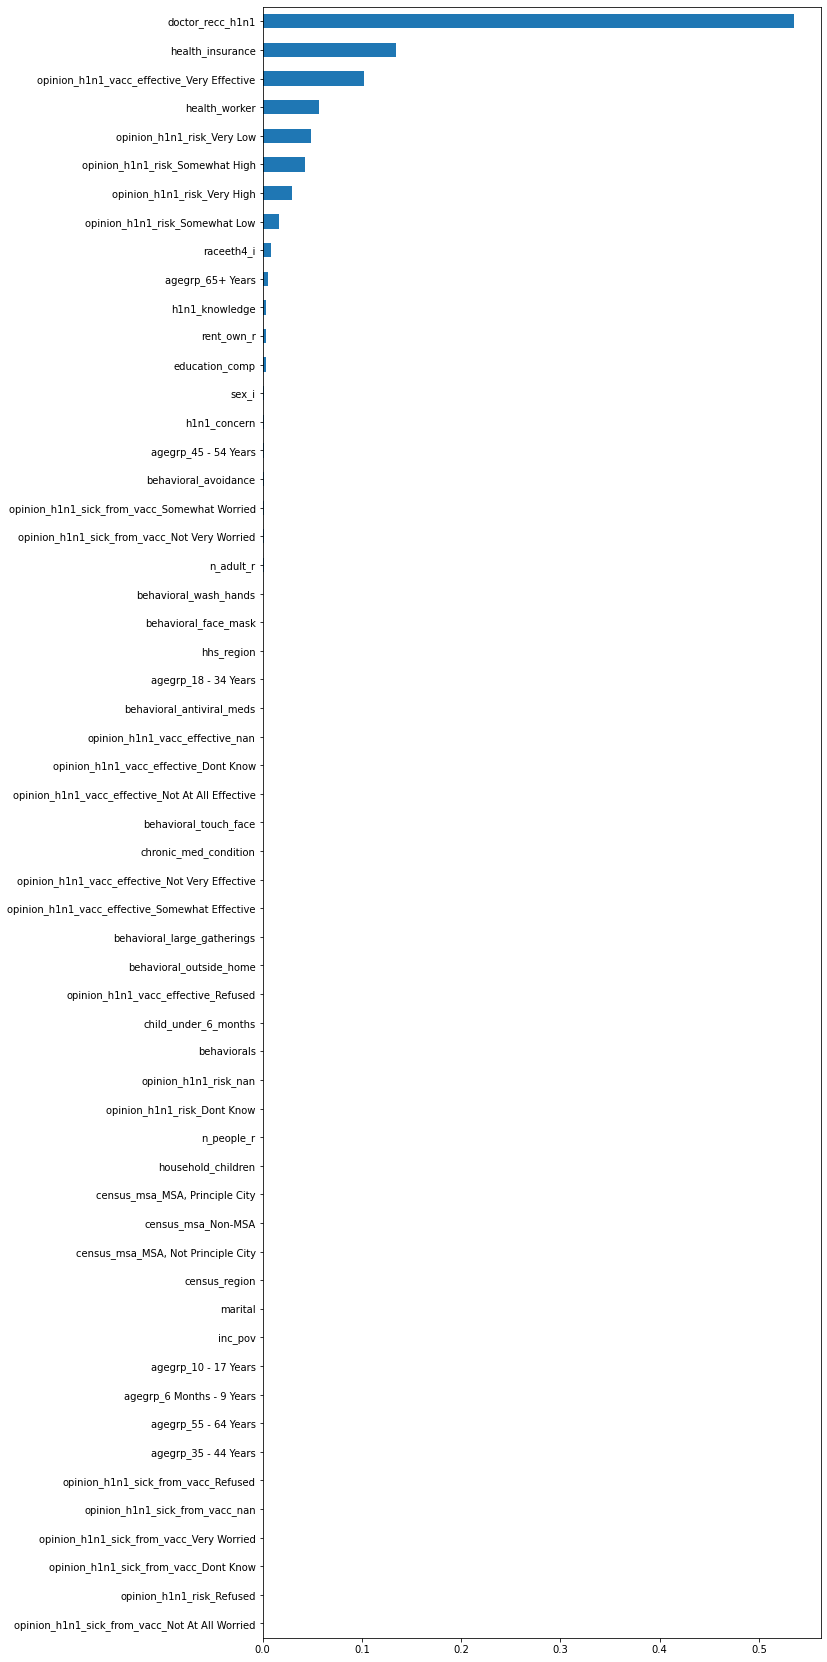

In [ ]:
model_dt = pipe.named_steps['decisiontreeclassifier']

importances = pd.Series(model_dt.feature_importances_, encoded_columns)
plt.figure(figsize=(10, 30))
importances.sort_values().plot.barh();

선형모델에서는 특성과 타겟의 관계를 확인하기 위해 '회귀계수(coefficients)'를 사용했다.

결정트리모델에서는 회귀계수 대신 '특성중요도(feature importance)'로 확인할 수 있다. 

회귀계수와 달리 특성중요도는 항상 **양수값**을 가지는 특징이 있습니다.

이 값을 통해 해당 특성(feature)이 얼마나 빨리 또는 자주 분기에 사용되고 있는지 결정된다.